# Optomechanics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

## QuTip

System Parameters (in units of wm)

https://github.com/qutip/qutip-notebooks/blob/master/examples/optomechanical-steadystate.ipynb

In [2]:
from qutip import tensor, destroy, qeye

# System Parameters (in units of wm)
#-----------------------------------
Nc = 20                      # Number of cavity states
Nm = 20                     # Number of mech states
kappa = 0.3                 # Cavity damping rate
E = 0.1                     # Driving Amplitude         
g0 = 2.4*kappa              # Coupling strength
Qm = 1e4                    # Mech quality factor
gamma = 1/Qm                # Mech damping rate
n_th = 1                    # Mech bath temperature
delta = -0.43               # Detuning



# Operators
#----------

## This choice does not lead to tridiagonal matrix
#a = tensor(qeye(Nm), destroy(Nc))
#b = tensor(destroy(Nm), qeye(Nc), )

# This is a tri-diagonal matrix 
a = tensor(destroy(Nc), qeye(Nm))
b = tensor(qeye(Nc), destroy(Nm))

num_b = b.dag()*b
num_a = a.dag()*a

# Hamiltonian
#------------

H = -delta * num_a + num_b + g0 * (b.dag() + b) * num_a #+ E*(a.dag()+a)

# from qutip.visualization import hinton
# hinton(num_a)

In [3]:
qutip_energies = H.eigenenergies()

## Tridiagonalization method

In [4]:
na_range = np.arange(Nc)
nb_range = np.arange(Nm)

# cartesian product 
na = np.repeat(na_range, nb_range.size)
nb = np.tile(nb_range, na_range.size)

In [5]:
na, nb

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11,
        11, 

In [6]:
tridiag_energies = eigh_tridiagonal(
    -delta * na + nb, g0 * (na * np.sqrt(nb))[:-1],
    eigvals_only = True
)

## Comparison 

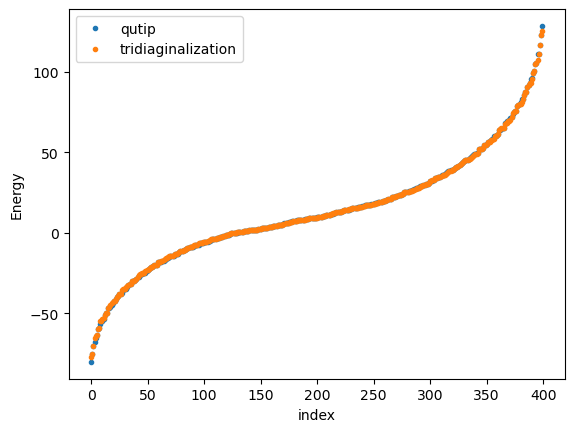

In [7]:
plt.plot(qutip_energies, ".", label="qutip")
plt.plot(tridiag_energies, ".", label="tridiaginalization")
plt.xlabel("index")
plt.ylabel("Energy")
plt.legend()
plt.show()

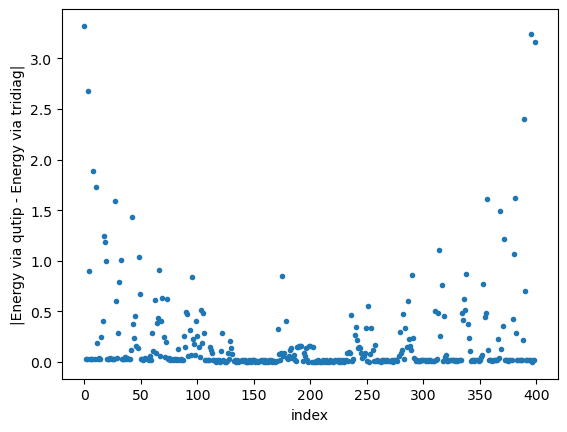

In [8]:
plt.plot(np.abs(qutip_energies - tridiag_energies), ".", label="qutip - tridiag")
plt.xlabel("index")
plt.ylabel("|Energy via qutip - Energy via tridiag|")

plt.show()